## Исследование данных о российском кинопрокате



Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Выяснить закономерности с фильмами, которые получили государственную поддержку. Данные о фильмах и прокате представлены в портале открытых данных Министерства культуры.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# импортируем библиотеки
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# прочитаем таблицу "mkrf_movies.csv"
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
# изучим основные данные в таблице
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблице 15 колонок. 3 из них имеют тип "float64", остальные 12 имеют тип "object". Всего строк 7486. Есть строки, в которых большенство строк не заполнены.

In [4]:
# выполним поиск буквенного значения из-за которого возникала ошибка
mkrf_movies[mkrf_movies['puNumber']== 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# заменим буквенное значние на 0
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет','puNumber'] = 0

In [6]:
# изменим тип в столбце "puNumber" на "int64"
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')

In [7]:
# ознакомимся с данными в таблице "mkrf_movies"
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


В таблице все столбцы уже приведены к иденому виду, кроме "puNumber". При первом взгляде видно незаполненые столбцы "refundable_support",	"nonrefundable_support"	и "budget	financing_sourc".

In [8]:
# прочитаем таблицу "mkrf_shows.csv"
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [9]:
# изучим основные данные в таблице
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В таблице 2 столбца. Один из них имеет тип "int64", другой имеет тип "float64". Всего строк 3158. Все строки заполнены и пропусков нет.

In [10]:
# ознакомимся с данными в таблице "mkrf_shows"
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [11]:
# объединим таблицы, используя метод merge и запишем в переменную data
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [12]:
# ознакомимся с полученной таблицей
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В результате все строки из mkrf_movies сохранены и к ним добавлена колонка "box_office".

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
#укажем тип "datetime" в столбце "show_start_date"
data['show_start_date'] = [dt.datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%fZ') for date in data['show_start_date']] 

Теперь в стобце начала показа указана дата и время.

In [14]:
# заменим значение "99%" на 9.9 методом replace
data['ratings'] = data['ratings'].replace('99%','9.9')

In [15]:
# заменим значение "90%" на 9.0 методом replace
data['ratings'] = data['ratings'].replace('90%','9.0')

In [16]:
# заменим значение "28%" на 2.8 методом replace
data['ratings'] = data['ratings'].replace('28%','2.8')

In [17]:
# заменим значение "97%" на 9.7 методом replace
data['ratings'] = data['ratings'].replace('97%','9.7')

In [18]:
# заменим значение "83%" на 8.3 методом replace
data['ratings'] = data['ratings'].replace('83%','8.3')

In [19]:
# заменим значение "64%" на 6.6 методом replace
data['ratings'] = data['ratings'].replace('64%','6.4')

In [20]:
# заменим значение "91%" на 9.1 методом replace
data['ratings'] = data['ratings'].replace('91%','9.1')

In [21]:
# заменим значение "94%" на 9.4 методом replace
data['ratings'] = data['ratings'].replace('94%','9.4')

In [22]:
# заменим значение "62%" на 6.2 методом replace
data['ratings'] = data['ratings'].replace('62%','6.2')

In [23]:
# заменим значение "79%" на 7.9 методом replace
data['ratings'] = data['ratings'].replace('79%','7.9')

In [24]:
# заменим значение "19%" на 1.9 методом replace
data['ratings'] = data['ratings'].replace('19%','1.9')

In [25]:
# заменим значение "88%" на 8.8 методом replace
data['ratings'] = data['ratings'].replace('88%','8.8')

In [26]:
# заменим значение "89%" на 8.9 методом replace
data['ratings'] = data['ratings'].replace('89%','8.9')

In [27]:
# заменим значение "98%" на 9.8 методом replace
data['ratings'] = data['ratings'].replace('98%','9.8')

In [28]:
# укажем тип 'float' в столбце "ratings"
data['ratings'] = data['ratings'].astype('float')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [29]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [30]:
# узнаем количество пропусков в столбце "title"
data['title'].isnull().sum()

0

In [31]:
# узнаем количество пропусков в столбце "puNumber"
data['puNumber'].isnull().sum()

0

In [32]:
# ознакомимся со значениями в столбце "puNumber"
data['puNumber'].value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: puNumber, Length: 7484, dtype: int64

В "puNumber" есть стока с не заполненым значением. Ранее значение "нет" было заменено на "0" для удобства работы с данными. "0" будет обозначать, что нет номера прокатного удостоверения.

In [33]:
# узнаем количество пропусков в столбце "show_start_date"
data['show_start_date'].isnull().sum()

0

In [34]:
# ознакомимся со значениями в столбце "show_start_date"
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [35]:
# узнаем количество пропусков в столбце "type"
data['type'].isnull().sum()

0

In [36]:
# ознакомимся со значениями в столбце "film_studio"
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                                                                                 341
ООО "Мульт в кино"                                                                                                                                                                     57
Анимаккорд Лтд                                                                                                                                                                         23
ООО "Мульт в кино"                                                                                                                                                                     18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                                                                                 16
                                                                      

In [37]:
# узнаем количество пропусков в столбце "film_studio"
data['film_studio'].isnull().sum()

18

In [38]:
# ознакомимся с пропусками в колонке 'film_studio'
data[data['film_studio'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# заполним пустые значения на 'Не указана'
data['film_studio'] = data['film_studio'].fillna('Студия не указана')

Пустые значения в этом столбце могли появиться из-за отсутствия киностодии, либо данные значения не указали. Пустые значения заполнил значением "Студия не указана".

In [40]:
# ознакомимся с пропусками в столбце "production_country" 
data[data['production_country'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,Студия не указана,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [41]:
data.loc[data['puNumber'] == 111001216, 'production_country'] = 'Россия'

In [42]:
data['production_country'] = data['production_country'].fillna('Страна не указана')

Пропуски могли быть связаны с отсутствующим поле при заполнении, либо отсутствием требования к заполнению. Пустые значения для "Ералаша" заполнил значением 'Россия', потому что аналогов нет, а датав выпуска 2016 год. Пустые значения для других строк заполнил значением "Страна не указана", потому что нет косвенных указаний на страну.

In [43]:
# ознакомимся с пропусками в столбце "director" 
data[data['director'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,Студия не указана,Страна не указана,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [44]:
# заполним пустые значения на 'Не указан'
data['director'] = data['director'].fillna('Режиссёр не указан')

Пропуски в столбце могли появиться из-за того, что поле было необязательное и его не заполнели. Либо связано с потерей данных. Пропуски заполнил значением "Режиссёр не указан".

In [45]:
# ознакомимся с пропусками в таблице в столбце "producer"
data[data['producer'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [46]:
data['producer'] = data['producer'].fillna(data['director'][data['producer'].isnull() == True])

Часто роль режиссера и продюссера выполняет один человек. Заполним пропуски значеним из "director"

In [47]:
# проверим оставшиеся значения в "producer"
data[data['producer'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [48]:
# заполним оставшиеся пропуски в "producer" на "Продюсер не указан"
data['producer'] = data['producer'].fillna('Продюсер не указан')

Оставшиеся значения заполним "Не указан".

In [49]:
# ознакомимся с пропусками в столбце "age_restriction"
data[data['age_restriction'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [50]:
# ознакомимся с пропусками в столбце 'refundable_support'
data[data['refundable_support'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Большая часть значений объёма возвратных средств государственной поддержки не указана. Это может означать, что в возвратов не было, либо нечего было возвращать. Такие пропуски оставим без измения.

In [51]:
# ознакомимся с пропусками в столбце 'refundable_support'
data[data['nonrefundable_support'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в данных полях могут означать, что количество невозвратных средств государственной поддержки равно нулю, либо ее не было.
Количество строк с пропусками в объёме невозвратных средств государственной поддержки равно количеству строк в объёме возвратных средств государственной поддержки. Это может означать, что это фильмы не имют государственной поддержки, либо значения просто не заполнены.

In [52]:
# ознакомимся с пропусками в таблице 
data[data['budget'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуске в столбце общий бюджет фильма также могут означать, что значение просто не указали. Потому что фильмы, снятые какой-либо студией имеют бюджет. Оставим строки без изменения. 

In [53]:
# ознакомимся со значениями в "financing_source"
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [54]:
# ознакомимся с пропусками в столбце "financing_source"
data[data['financing_source'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# заполним пропуски в "financing_source" на "Финансирование не указано"
data['financing_source'] = data['financing_source'].fillna('Источник не указан')

Пропуски в "financing_source" могли возникнуть из-за того, что данные не указали. Количество пропущенных строк равно количеству пропущеных в "nonrefundable_support" и "refundable_support" и  "budget". Возможно, данные были удалены. Либо фильмы не имеют государственной поддрежки.

In [56]:
# ознакомимся с пропусками в таблице 
data[data['ratings'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","А.Столпер, Б.Иванов",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Владимир Дрга,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Б.Барнет,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN


Пропуски в этих строках могут быть связаны с тем, что рейтинг действительно не проставляли по фильмам. Пропуски оставлю без изменений, так как значение "0" это тоже рейтинг.

Пропуски могли возниктнуть в результате потери данных, либо рейтинг скрыли. Пропуски в рейгинге оставил без изменений, так как рейтинг и так является средней оценкой фильма.

In [57]:
# ознакомимся с пропусками в колонке "genres" 
data[data['genres'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","А.Столпер, Б.Иванов",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Владимир Дрга,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Б.Барнет,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,NaN,NaN


In [58]:
data['genres'] = data['genres'].fillna('Жанр не указан')

Пропуски могут быть связаны с потерей данных или так же человеческим фактором. Пропуски заполнил значением "Жанр не указан".

In [59]:
# ознакомимся с пропусками в колонке "box_office"
data[data['box_office'].isnull() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Источник не указан,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,Жанр не указан,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,Жанр не указан,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,Жанр не указан,NaN


Пусты значения говорят о том, что нет данных о сборах в рублях, либо их скрыли.

In [60]:
# повтоно ознакомимся ифнорцией о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7486 non-null   object        
 13  rat

В результате получилось заполнить почти все значения, кроме столбцов с типом "float64".

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [61]:
# выполним поиск полных дублей в таблице
data[data.duplicated()==True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Полных дублей в таблице не найдено.

In [62]:
# ознакомимся со дублями в столбце "puNumber"
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.60,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,6.80,"комедия,криминал",NaN


Прокатное удостоверение выдается на конкретный фильм. Поэтому дубли могли образовать либо из-за ошибки ввода, либо ошибка в данных. И один из фильмом был показан под другим прокатным удостоверением. 

In [63]:
# заменим значение "puNumber" в строке "4639"
data.loc[data.index == 4639,'puNumber'] = 221154310111

In [64]:
# заменим значение "puNumber" в строке "5068"
data.loc[data.index == 5068,'puNumber'] = 221054410111

Значение "puNumber" совпало в двух строках. Заменил значение "puNumber" на "221054410111" в строке "5068" и "221154310111" в строке "4639" , чтобы сохранить данные, но так чтобы прокатный номер был уникален.

In [65]:
# ознакомимся с дубликатами в "title"
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"триллер,криминал,детектив",NaN


Дубликаты в данном столбце могли быть вызваны тем, что один и тот же фильм имел разный прокатный номер в разных кинотеатрах или годах трансляции. Дубликаты убрать нельзя.

In [66]:
# ознакомимся с дубликатами в "type"
data[data['type'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Источник не указан,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,В.Абдрашитов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Источник не указан,7.70,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,NaN,Жанр не указан,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,Жанр не указан,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Источник не указан,NaN,Жанр не указан,NaN


In [67]:
# рассмотрим все значения в "type"
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [68]:
# заменим неявные дубликаты в столбце 'type'
data['type'] = data['type'].replace(' Художественный','Художественный')

In [69]:
# заменим неявные дубликаты в столбце 'type'
data['type'] = data['type'].replace(' Анимационный','Анимационный')

В типах фильмов были найдены неявные дубли: в них поправил название. Их осталось 6 уникальных типов.

In [70]:
# ознакомимся с дубликатами в "film_studio"
data[data['film_studio'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,В.Абдрашитов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Источник не указан,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,В.Меньшов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,8.30,"мелодрама,комедия","2,700.00"
11,Ответный ход,111019014,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,М.Туманишвили,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00"
7475,Папа,111022919,2019-12-24 12:00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,8.20,драма,NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",NaN


Дубликаты в этом столбце необходимо оставить, так как студии могли снимать не один фильм.

Также в столбцах "production_country","age_restriction", "refundable_support", "nonrefundable_support", "budget", "financing_source", "ratings", "genres" и "box_office" есть повторяющие значения, но это абсолютно оправдано, так как бюджеты и рейтинги могут повторяться. В столбцах "director" и "film_studio" также указано по несколько значений: то есть над фильмом роботала группа режиссеров. 

In [71]:
# ознакомимся с дубликатами по "title"
data[data.duplicated('title') == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Источник не указан,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Источник не указан,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,Источник не указан,6.80,"триллер,криминал,детектив",NaN


По значениям в колонке "title" найдено 714 фильма. Тут повторения также допустимы, так как они имеют разный "puNumber": фильм мог быть показ в разных кинотеартах.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [72]:
# исправим значения в столбце "title"
data['title'].str.strip()

0                                   Открытый простор
1                               Особо важное задание
2                                       Особо опасен
3                                       Особо опасен
4                                       Особо опасен
                            ...                     
7481       Сад художника: Американский импрессионизм
7482                                 Звериная ярость
7483       Щенячий патруль: Скорей спешим на помощь!
7484        Машины песенки. Серия "Испанские мотивы"
7485    Машины песенки. Серия "Когда цветут кактусы"
Name: title, Length: 7486, dtype: object

In [73]:
# исправим значения в столбце "type"
data['type'].str.strip()

0       Художественный
1       Художественный
2       Художественный
3       Художественный
4       Художественный
             ...      
7481            Прочие
7482    Художественный
7483    Художественный
7484      Анимационный
7485      Анимационный
Name: type, Length: 7486, dtype: object

In [74]:
# исправим значения в столбце "film_studio"
data['film_studio'].str.strip()

0       Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                   Киностудия "Мосфильм"
2       Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3       Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4       Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
                              ...                        
7481                                 Севен Артс Продакшнз
7482    Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...
7483             Никелодеон Анимейшн Студиос, Спин Мастер
7484             Анимаккорд Лтд., ООО Студия "АНИМАККОРД"
7485             Анимаккорд Лтд., ООО Студия "АНИМАККОРД"
Name: film_studio, Length: 7486, dtype: object

In [75]:
# исправим значения в столбце "production_country"
data['production_country'].str.strip()

0                           США
1                          СССР
2                           США
3                           США
4                           США
                 ...           
7481             Великобритания
7482                        США
7483               США - Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, Length: 7486, dtype: object

In [76]:
# исправим значения в столбце "director"
data['director'].str.strip()

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
3       Тимур Бекмамбетов
4       Тимур Бекмамбетов
              ...        
7481          Фил Грабски
7482           Ник Пауэлл
7483     Чарльз Е.Бастьен
7484             А.Беляев
7485             И.Трусов
Name: director, Length: 7486, dtype: object

In [77]:
# исправим значения в столбце "production_country"
data['production_country'].replace('США - Канада','США, Канада')

0                           США
1                          СССР
2                           США
3                           США
4                           США
                 ...           
7481             Великобритания
7482                        США
7483                США, Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, Length: 7486, dtype: object

In [78]:
# исправим значения в столбце "producer"
data['producer'].str.strip()

0               Дэвид Валдес, Кевин Костнер, Джейк Эбертс
1                                               Е.Матвеев
2       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
3       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
4       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
                              ...                        
7481                                          Фил Грабски
7482    Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...
7483                                       Дженнифер Додж
7484                                            Д.Ловейко
7485                                            Д.Ловейко
Name: producer, Length: 7486, dtype: object

In [79]:
# исправим значения в столбце "age_restriction"
data['age_restriction'].str.strip()

0                  «18+» - запрещено для детей
1                «6+» - для детей старше 6 лет
2                  «18+» - запрещено для детей
3                  «18+» - запрещено для детей
4                  «18+» - запрещено для детей
                         ...                  
7481           «12+» - для детей старше 12 лет
7482           «16+» - для детей старше 16 лет
7483    «0+» - для любой зрительской аудитории
7484    «0+» - для любой зрительской аудитории
7485    «0+» - для любой зрительской аудитории
Name: age_restriction, Length: 7486, dtype: object

In [80]:
# исправим значения в столбце "age_restriction"
data['financing_source'].str.strip()

0       Источник не указан
1       Источник не указан
2       Источник не указан
3       Источник не указан
4       Источник не указан
               ...        
7481    Источник не указан
7482    Источник не указан
7483    Источник не указан
7484    Источник не указан
7485    Источник не указан
Name: financing_source, Length: 7486, dtype: object

In [81]:
# исправим значения в столбце "genres"
data['genres'].str.strip()

0          боевик,драма,мелодрама
1                   драма,военный
2       фантастика,боевик,триллер
3       фантастика,боевик,триллер
4       фантастика,боевик,триллер
                  ...            
7481               Жанр не указан
7482               боевик,триллер
7483               Жанр не указан
7484               Жанр не указан
7485              комедия,вестерн
Name: genres, Length: 7486, dtype: object

В данных встречаются значения, содержащие несколько значений через запятую. Это усложняет классификацию по ним. Можно разбить значения в отдельные столбцы.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [82]:
# изучим значения в "refundable_support"
data['refundable_support'].value_counts()

0.00              221
20,000,000.00      12
10,000,000.00      10
25,000,000.00      10
15,000,000.00       9
5,000,000.00        9
50,000,000.00       8
40,000,000.00       8
30,000,000.00       7
60,000,000.00       6
100,000,000.00      5
110,000,000.00      2
55,000,000.00       2
19,000,000.00       2
75,000,000.00       2
7,153,119.00        1
35,000,000.00       1
9,000,000.00        1
150,000,000.00      1
36,000,000.00       1
29,000,000.00       1
17,000,000.00       1
180,000,000.00      1
115,000,000.00      1
41,000,000.00       1
26,000,000.00       1
7,000,000.00        1
7,346,881.00        1
3,500,000.00        1
8,000,000.00        1
38,000,000.00       1
44,000,000.00       1
28,000,000.00       1
80,000,000.00       1
Name: refundable_support, dtype: int64

In [83]:
# изучим основные параметры в "refundable_support"
data['refundable_support'].describe()

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

In [84]:
# изучим основные параметры в "refundable_support" без пустых значений
data.loc[data['refundable_support'] != 0,'refundable_support'].describe()

count           111.00
mean     35,486,486.49
std      31,972,875.36
min       3,500,000.00
25%      15,000,000.00
50%      25,000,000.00
75%      50,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

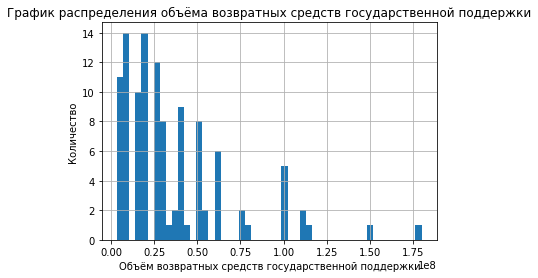

In [85]:
data.loc[data['refundable_support'] != 0,'refundable_support'].plot (kind='hist',bins=50,grid=True, title='График распределения объёма возвратных средств государственной поддержки')
plt.show( 
plt.xlabel('Объём возвратных средств государственной поддержки'),
plt.ylabel('Количество'))

Если из данных убрать пустые значения, то значения имеют равномерное распределение с аномальными значениями. 

In [86]:
# изучим значения в "nonrefundable_support"
data['nonrefundable_support'].value_counts()

25,000,000.00     53
30,000,000.00     48
35,000,000.00     29
40,000,000.00     26
20,000,000.00     19
                  ..
31,000,000.00      1
29,000,000.00      1
138,969,465.00     1
3,000,000.00       1
25,900,000.00      1
Name: nonrefundable_support, Length: 75, dtype: int64

In [87]:
# изучим основные параметры в "nonrefundable_support"
data['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

In [88]:
# изучим основные параметры в "nonrefundable_support" без пустых значений
data.loc[data['nonrefundable_support'] != 0,'nonrefundable_support'].describe()

count           323.00
mean     50,345,784.25
std      60,243,206.31
min       3,000,000.00
25%      25,000,000.00
50%      30,000,000.00
75%      45,000,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

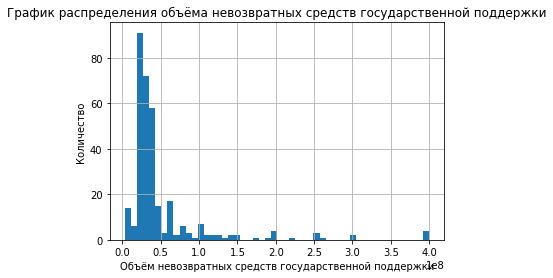

In [89]:
# посмторим на графыике "nonrefundable_support" без пустых значений
data.loc[data['nonrefundable_support'] != 0,'nonrefundable_support'].plot(kind='hist',bins=50,grid=True, title='График распределения объёма невозвратных средств государственной поддержки')
plt.show( 
plt.xlabel('Объём невозвратных средств государственной поддержки'),
plt.ylabel('Количество'))

Если из данных убрать пустые значения, то значения имеют равномерное распределение. Но с аномалиями – максимальное и минимальное значение.

In [90]:
# посмторим на графыике "budget"
data['budget'].value_counts()

0.00              17
38,000,000.00      6
80,000,000.00      4
50,000,000.00      4
40,000,000.00      3
                  ..
49,280,496.00      1
56,693,559.00      1
57,166,797.00      1
109,814,241.00     1
42,252,509.00      1
Name: budget, Length: 290, dtype: int64

In [91]:
# изучим основные параметры в "budget" без пустых значений
data.loc[data['budget'] != 0,'budget'].describe()

count             315.00
mean      134,096,082.35
std       191,226,039.63
min        14,462,464.00
25%        46,153,866.50
50%        73,379,554.00
75%       150,004,286.50
max     2,305,074,303.00
Name: budget, dtype: float64

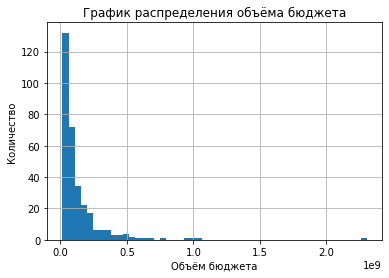

In [92]:
# посмторим на графыике "budget" без пустых значений
data.loc[data['budget'] != 0,'budget'].plot(kind='hist',bins=50,grid=True, title='График распределения объёма бюджета')
plt.show( 
plt.xlabel('Объём бюджета'),
plt.ylabel('Количество'))

Наблюдается быстрый рост от минимального значения до первой квадрилии. Далее постепенный спад бюджета. А также в данных есть аномалия – максимальное значение.

In [93]:
# узнаем количемство значений в столбцах "budget", "refundable_support" и "nonrefundable_support"
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7486 non-null   object        
 13  rat

Количество заполненых значений в бюджете фильма равен количеству строк объёма невозвратных средств государственной поддержки и количеству строк объёму возвратных средств государственной поддержки.

In [94]:
# изучим основные параметры в "ratings"
data['ratings'].describe()

count   6,519.00
mean        6.49
std         1.11
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

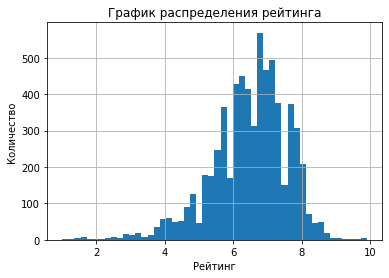

In [95]:
# посмторим на графике "ratings" без пустых значений
data['ratings'].plot(kind='hist',bins=50,grid=True, title='График распределения рейтинга')
plt.show( 
plt.xlabel('Рейтинг'),
plt.ylabel('Количество'))

Средний рейтинг равен 6.49. Имеются вспелск количества фильмов с оценкой около 7. Затем наблюдается резкский спад количемства фильмов с высоким рейтингов: начиная с оценки больше 8 количество фильмов меньше 100.

In [96]:
# изучим основные параметры в "box_office"
data['box_office'].describe()

count           3,158.00
mean       76,478,696.16
std       240,353,122.82
min                 0.00
25%            86,239.00
50%         2,327,987.55
75%        23,979,671.02
max     3,073,568,690.79
Name: box_office, dtype: float64

In [97]:
# изучим основные параметры в "box_office" без пустых значений
data.loc[data['box_office'] != 0,'box_office'].describe()

count           3,134.00
mean       77,064,365.82
std       241,178,383.77
min                40.00
25%           101,028.75
50%         2,409,099.35
75%        24,569,794.87
max     3,073,568,690.79
Name: box_office, dtype: float64

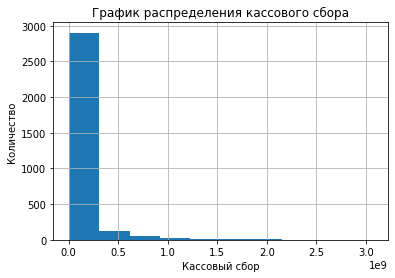

In [98]:
# посмторим на графике "box_office" без пустых значений
data.loc[data['box_office'] != 0,'box_office'].plot(kind='hist',bins=10,grid=True, title='График распределения кассового сбора')
plt.show( 
plt.xlabel('Кассовый сбор'),
plt.ylabel('Количество'))

Большая часть сборов составила имеет распределени от 100тыс. до 24млн. Также есть аномалии в максимальном значении 3,073,568,690.79 и минимальном значении 40.00. 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [99]:
# создаем столбец с годом проката
data['year_go'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [100]:
# добавляем столбец с главным продюсером
data['main_producer'] = [producer.split(',')[0] for producer in data['producer']] 

In [101]:
# добавляем столбец с основным жарном
data['main_genres'] = [genres.split(',')[0] for genres in data['genres']] 

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [102]:
# добавляем столбец с долей государственной поддержки к бюджету
data['share_gos'] = (data['refundable_support']+data['nonrefundable_support'])/data['budget']

In [103]:
# изучим таблицу после предобработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7486 non-null   object        
 13  rat

В таблице практически не найдено дублей. Пропуски в числовых значениях заполнить не получилось, так как пропусти имеют смысл.Большая часть категоричальных данных имеет сгруппрированные данны, которые сложно использовать для поиска уникальных.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [104]:
# посчитаем сколько фильмов выходило в прокат каждый год
data.loc[data['puNumber'] != 0,('puNumber','year_go')].pivot_table(values='puNumber', index='year_go', aggfunc='count')

,puNumber
year_go,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


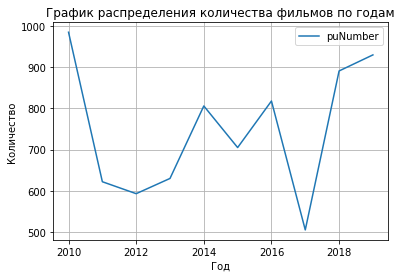

In [105]:
# количество фильмов вышедших в прокат по годам
data.loc[data['puNumber'] != 0,('puNumber','year_go')].pivot_table(values='puNumber', index='year_go', aggfunc='count').plot(grid=True, title='График распределения количества фильмов по годам')
plt.show(
plt.xlabel('Год'),
plt.ylabel('Количество'))

In [106]:
# посчитаем количество фильмов с указанной информацией о прокате в кинотеатрах 
data.loc[data['box_office'].isnull() == False, ('box_office','year_go')].pivot_table(values='box_office', index='year_go', aggfunc='count')

,box_office
year_go,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


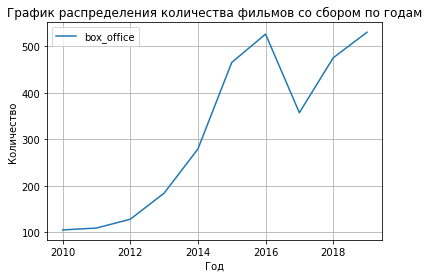

In [107]:
# построим график долю фильмов с указанной информацией о прокате в кинотеатрах 
data.loc[data['box_office'].isnull() == False, ('box_office','year_go')].pivot_table(values='box_office', index='year_go', aggfunc='count').plot(grid=True, title='График распределения количества фильмов со сбором по годам')
plt.show(
plt.xlabel('Год'),
plt.ylabel('Количество'))

In [108]:
# считаем долю фильмов, имющих сборы, к выпущеным в прокат
data.loc[data['box_office'].isnull() == False, ('box_office','year_go')].pivot_table(values='box_office', index='year_go', aggfunc='count')['box_office']/data.loc[data['puNumber'] != 0,('puNumber','year_go')].pivot_table(values='puNumber', index='year_go', aggfunc='count')['puNumber']

year_go
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

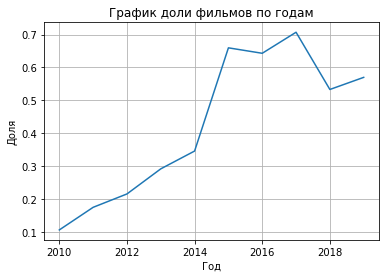

In [109]:
# стоим график доли фильмов, имющих сборы, к выпущеным в прокат
(
    data.loc[data['box_office']
             .isnull() == False, ('box_office','year_go')]
                .pivot_table(values='box_office', index='year_go', aggfunc='count')['box_office']
    /data.loc[data['puNumber'] != 0,('puNumber','year_go')]
            .pivot_table(values='puNumber', index='year_go', aggfunc='count')['puNumber']
).plot(
    grid=True
    , title='График доли фильмов по годам'
)
plt.show(
plt.xlabel('Год'),
plt.ylabel('Доля'))

За весь период с 2010 по 2016 наблюдается постоянный рост доли фильмов. Затем небольшой спад. И с 2018 вновь наблюдается рост. Также замечен быстрый рост в 2014 году, поделивший график на две половины.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [110]:
# считаем долю фильмов, имющих сборы, к выпущеным в прокат
data.loc[data['box_office'].isnull() == False, ('box_office','year_go')].pivot_table(values='box_office', index='year_go', aggfunc='count')['box_office']/data.loc[data['puNumber'] != 0,('puNumber','year_go')].pivot_table(values='puNumber', index='year_go', aggfunc='count')['puNumber']

year_go
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

Минимальная доля фильмов с информацией о сборах была в 2010. Наиболее полно она представилена в 2017 году – максимальное значение.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [111]:
# подсчет среднего числа
data.pivot_table(values='box_office', index='year_go', aggfunc=['count','mean','median'])

,count,mean,median
,box_office,box_office,box_office
year_go,,,
2010,105,"23,130.04","1,700.00"
2011,109,"129,383.17","3,000.00"
2012,128,"54,339.24","5,660.00"
2013,184,"161,954.92","3,522.50"
2014,279,"26,684,415.27","18,160.00"
2015,465,"84,940,570.31","4,920,933.00"
2016,526,"91,000,569.85","3,846,679.41"
2017,357,"136,032,793.33","9,968,340.00"


С каждым годом данные о сборах увеличиваются. C 2010 по 2013 среднее значение было между "2.313004e+04" и "1.619549e+05". Затем каждый год наблюдает рост среднего числа сборов до "1.360328e+08". С 2019 года наблюдается спад до "9.136926e+07".
Медианное значение в разы меньше среднего значения. Это закономерно, так как в данных были аномальные значения.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [112]:
# создадим таблицу с годами выпуска
df = data.loc[data['year_go'] >= 2015]

In [113]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           1172
«18+» - запрещено для детей               1086
«12+» - для детей старше 12 лет            789
«6+» - для детей старше 6 лет              485
«0+» - для любой зрительской аудитории     317
Name: age_restriction, dtype: int64

In [114]:
# заменим значения на короткие в столбце 'age_restriction'
df['age_restriction'] = df['age_restriction'].replace('«16+» - для детей старше 16 лет', '16+')
df['age_restriction'] = df['age_restriction'].replace('«18+» - запрещено для детей', '18+')
df['age_restriction'] = df['age_restriction'].replace('«12+» - для детей старше 12 лет', '12+')
df['age_restriction'] = df['age_restriction'].replace('«6+» - для детей старше 6 лет', '6+')
df['age_restriction'] = df['age_restriction'].replace('«0+» - для любой зрительской аудитории', '0+')

In [115]:
df.pivot_table(values='box_office', index=['year_go','age_restriction'])

box_office
year_go age_restriction               
2015    0+                9,719,348.16
        12+             186,521,671.35
        16+              67,667,386.13
        18+              41,153,851.27
        6+              164,184,893.80
2016    0+                3,664,118.26
        12+             148,834,713.71
        16+              91,563,453.53
        18+              44,992,912.71
        6+              172,187,800.12
2017    0+               76,532,976.67
        12+             191,498,235.63
        16+             154,917,709.92
        18+              65,656,432.52
        6+              268,580,936.57
2018    0+                6,489,800.42
        12+             212,944,651.65
        16+             105,792,322.74
        18+              48,939,025.15
        6+              148,602,567.99
2019    0+                5,915,355.61
        12+             149,178,809.10
        16+              71,648,421.26
        18+              55,310,362.31
        6+              158,673,440.13

In [116]:
# ознакомимся со средними значениями по каждому типу "age_restriction"
df.pivot_table(values='box_office', index=['year_go','age_restriction'])

box_office
year_go age_restriction               
2015    0+                9,719,348.16
        12+             186,521,671.35
        16+              67,667,386.13
        18+              41,153,851.27
        6+              164,184,893.80
2016    0+                3,664,118.26
        12+             148,834,713.71
        16+              91,563,453.53
        18+              44,992,912.71
        6+              172,187,800.12
2017    0+               76,532,976.67
        12+             191,498,235.63
        16+             154,917,709.92
        18+              65,656,432.52
        6+              268,580,936.57
2018    0+                6,489,800.42
        12+             212,944,651.65
        16+             105,792,322.74
        18+              48,939,025.15
        6+              148,602,567.99
2019    0+                5,915,355.61
        12+             149,178,809.10
        16+              71,648,421.26
        18+              55,310,362.31
        6+              158,673,440.13

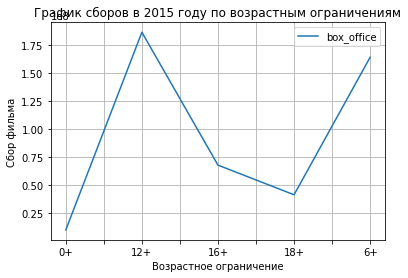

In [117]:
df.loc[df['year_go'] == 2015].pivot_table(values='box_office', index=['age_restriction']).plot(
    grid=True
    , title='График сборов в 2015 году по возрастным ограничениям'
)
plt.show(
plt.xlabel('Возрастное ограничение'),
plt.ylabel('Сбор фильма'))

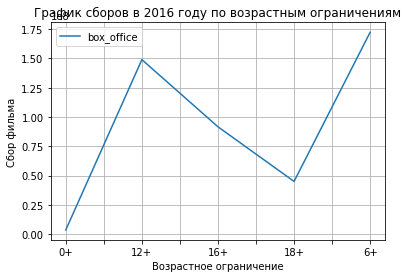

In [118]:
df.loc[df['year_go'] == 2016].pivot_table(values='box_office', index=['age_restriction']).plot(
    grid=True
    , title='График сборов в 2016 году по возрастным ограничениям'
)
plt.show(
plt.xlabel('Возрастное ограничение'),
plt.ylabel('Сбор фильма'))

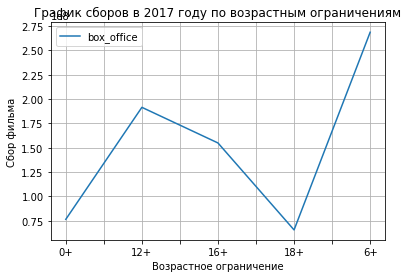

In [119]:
df.loc[df['year_go'] == 2017].pivot_table(values='box_office', index=['age_restriction']).plot(
    grid=True
    , title='График сборов в 2017 году по возрастным ограничениям'
)
plt.show(
plt.xlabel('Возрастное ограничение'),
plt.ylabel('Сбор фильма'))

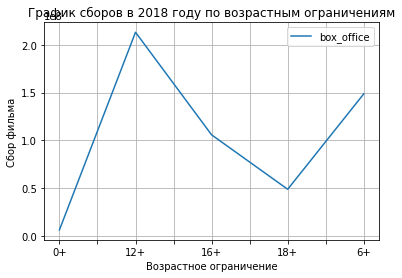

In [120]:
df.loc[df['year_go'] == 2018].pivot_table(values='box_office', index=['age_restriction']).plot(
    grid=True
    , title='График сборов в 2018 году по возрастным ограничениям'
)
plt.show(
plt.xlabel('Возрастное ограничение'),
plt.ylabel('Сбор фильма'))

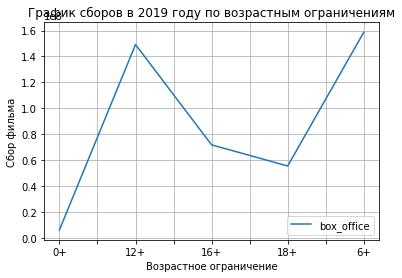

In [121]:
df.loc[df['year_go'] == 2019].pivot_table(values='box_office', index=['age_restriction']).plot(
    grid=True
    , title='График сборов в 2019 году по возрастным ограничениям'
)
plt.show(
plt.xlabel('Возрастное ограничение'),
plt.ylabel('Сбор фильма'))

Графики очень похожи на друг друга. В фильмах c категорией от "«0+» - для любой зрительской аудитории ", "«6+» - для детей старше 6 лет" и "«12+» - для детей старше 12 лет" наблюдается постоянный рост сборов. А вот в категориях с "«12+» - для детей старше 12 лет","«16+» - для детей старше 16 лет" и "«18+» - запрещено для детей" наблюдается спад. В зависимости от года он был больше, либо меньше.  Данная тенденция обоснована тем, что с увеличением востраста люди реже ходят в кино. 
В 2017 наблюдался спад для категории "«0+» - для любой зрительской аудитории " это может быть связано с внешними факторами, например, экономическими.
Больше всего собрала категория "«6+» - для детей старше 6 лет".

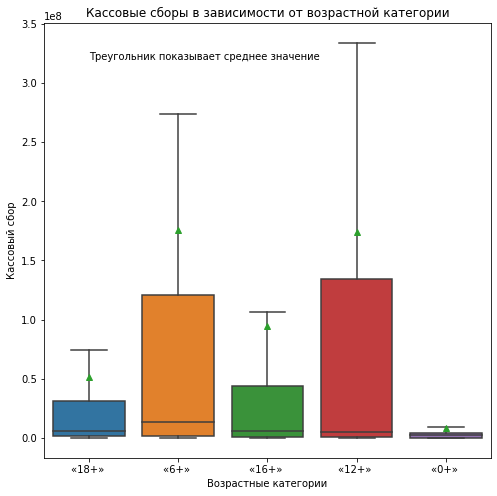

In [122]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year_go'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [123]:
# выделим фильмы с господдержкой
df = data[data['financing_source'] != 'Не указано']

In [124]:
# проверим окупаемость фильмов
df['rent'] = df['box_office'] / df['budget']

In [125]:
# ознакомимся с общими значениями в столбце
df.loc[df['rent']>=1,'rent'].count()

83

In [126]:
# ознакомимся с общими значениями в столбце
df['rent'].describe()

count   318.00
mean       inf
std        NaN
min       0.00
25%       0.02
50%       0.18
75%       1.03
max        inf
Name: rent, dtype: float64

In [127]:
# ознакомимся с общими значениями в столбце больше 1
df.loc[df['rent']>=1,'ratings'].describe()

count   81.00
mean     6.07
std      1.06
min      2.90
25%      5.20
50%      6.20
75%      6.80
max      8.50
Name: ratings, dtype: float64

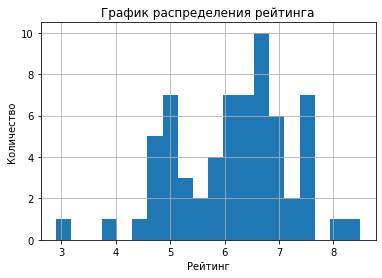

In [128]:
df['ratings'].loc[(df['rent']>=1) &(df['rent']<= 100)].plot(
    kind='hist',
    bins=20,
    grid=True
    , title='График распределения рейтинга'
)
plt.show(
plt.xlabel('Рейтинг'),
plt.ylabel('Количество'))

In [129]:
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Средний рейтинг фильмов с господдрежкой составляет 6.07. Максимальный рейтинг 8.5, а минимальный рейтинг 2.95. Всего фильмов с господдрежкой было снято 332. Из них у 83 окумаемость была положительной. Большая часть фильмов с господдрежкой имеют тип "Художественный". 

### Шаг 5. Напишите общий вывод

От Министерства культуры были получены 2 таблицы. Первая содержит информацию из реестра прокатных удостоверений, вторая содержит сведения о показах фильмов в российских кинотеатрах. В результате данные были объеденны так, чтобы кассовый сбор проставился для тех прокатных номеров, где они есть.

В итоговой таблице были найдены следующие особенности: 
    1. Только для одного фильма не был указан номер прокатного удостоверения;
    2. В категориальных данных большая часть значений определена не однозначно, и имеет перечисление уникальных значений в себе;
    3. Также были найдены и справлены значения с неверным форматом;
    4. Полных дублей в таблице не было найдено;
    5. В значениях объём возвратных средств государственной поддержки, объём невозвратных средств государственной поддержки и общий бюджет фильма большая часть данных не указан. Такие пропусти были оставлены без изменения.

Вывод:
Большая часть фильмов имеет прокатное удостоверение.
Максимальное количество выпущенных фильмов было в 2010 году. Затем наблюдался спад и небольшие увеличения числа фильмов. Но с 2019 наблюдается резкий рост числа фильмов.
В данных о кассовых сборах есть аномальные значения, которые показывют, интерес к фильму относильтельно других.
В фильмах c категорией от "«0+» - для любой зрительской аудитории " до "«12+» - для детей старше 12 лет" наблюдается постоянный рост сборов.
Средний рейтинг фильмов с господдрежкой составляет 6.07. 
Процент окумаемости таких фильмов составил 25%.
Большая часть фильмов с господдрежкой имеют тип "Художественный".

Наблюдается возрастающий тренд съемки фильмов и сборов по ним.